In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams, cm, ticker
import scipy.constants as sc
import pandas as pd
from astropy.io import fits
rcParams["figure.figsize"] = (5,2)

In [20]:
P = 100
R = np.logspace(np.log10(0.1), np.log10(100), P) # in au
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega

f_u0 = 0.5 * (u0**2 - 1) - np.log(u0)

<>:14: SyntaxWarning: invalid escape sequence '\,'
<>:17: SyntaxWarning: invalid escape sequence '\,'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\,'
<>:17: SyntaxWarning: invalid escape sequence '\,'
<>:20: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2175335/653896097.py:14: SyntaxWarning: invalid escape sequence '\,'
  ax1.set_ylabel('$\\Sigma$ / $\\mathrm{g\,cm^{-2}}$')
/tmp/ipykernel_2175335/653896097.py:17: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_ylabel('$c_s$ / $\\mathrm{km\,s^{-1}}$')
/tmp/ipykernel_2175335/653896097.py:20: SyntaxWarning: invalid escape sequence '\d'
  ax3.set_ylabel('$\dot\Sigma$ / $\\mathrm{g\,cm^{-2}\,s^{-1}}$')


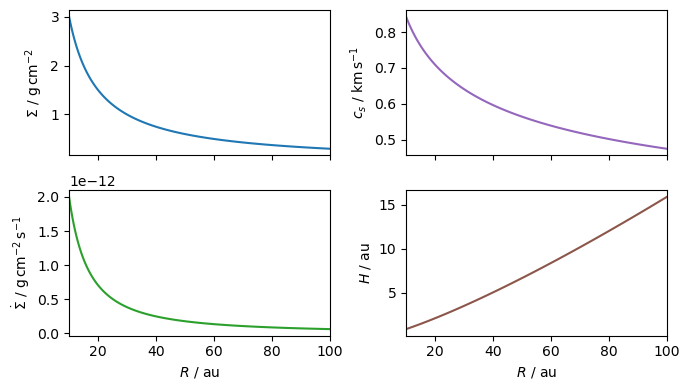

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(7,4))
axes = [ax1, ax2, ax3, ax4]

for i in axes[:2]:
    i.set_xlim(10,100)
    i.set_xticklabels([])
    # i.set_xscale('log')

for i in axes[2:]:
    i.set_xlim(10,100)
    i.set_xlabel('$R$ / $\\mathrm{au}$')

ax1.plot(R, sd)
ax1.set_ylabel('$\\Sigma$ / $\\mathrm{g\,cm^{-2}}$')

ax2.plot(R, c_s, c='C4')
ax2.set_ylabel('$c_s$ / $\\mathrm{km\,s^{-1}}$')

ax3.plot(R, sdot, c='C2')
ax3.set_ylabel('$\dot\Sigma$ / $\\mathrm{g\,cm^{-2}\,s^{-1}}$')

ax4.plot(R, H, c='C5')
ax4.set_ylabel('$H$ / $\\mathrm{au}$')

# ax4.plot(R, np.exp( - 0.5 - 1/H_R ), ls='--', c='C7', lw=0.8)
# ax4.plot(R, u0, c='C3')
# ax4.text(50, 0, 'transonic wind', c='grey')
# ax4.text(90, 0.002, '$u_0$', c='C3')
# ax4.set_ylabel('$u$ / $c_s$')

fig.tight_layout()

# plt.savefig('graphics/disc_properties_1.png', dpi=300, bbox_inches='tight')

<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_3570503/2703433136.py:3: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$\\rho_g$ / $\\mathrm{g\,cm^{-3}}$')
/tmp/ipykernel_3570503/2703433136.py:7: SyntaxWarning: invalid escape sequence '\,'
  plt.text(3.5,8e-14, 'at $R=10\,\mathrm{au}$')


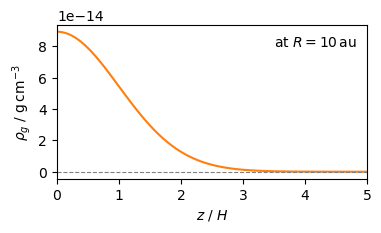

In [ ]:
rho = np.tile(rho0,(N,1)) * np.exp( -1/np.tile(H_R**2,(N,1)) * (1 - ( 1 + np.tile(H_R**2,(N,1))*np.tile(z,(P,1)).T**2 )**(-0.5) ) )
plt.plot(z, rho[:,0], c='C1')
plt.ylabel('$\\rho_g$ / $\\mathrm{g\,cm^{-3}}$')
plt.xlabel('$z$ / $H$')
plt.xlim(0,5)
plt.axhline(0, lw=0.8, c='gray', ls='--')
plt.text(3.5,8e-14, 'at $R=10\,\mathrm{au}$')
# plt.savefig('graphics/gas_vertical_density.png', dpi=300, bbox_inches='tight')

### Wind

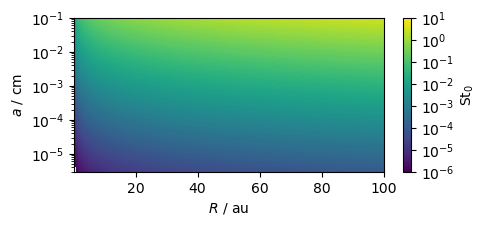

In [22]:
from matplotlib.colors import LogNorm

a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
a_max = 1000 / 1e4 # maximum grain size in cm, input in microns
M = 300 # number of grain sizes

a = np.logspace(np.log10(a_min), np.log10(a_max), M)
St0 = np.sqrt(2*np.pi)* np.tile(a, (P,1)).T * np.tile(rhos/sd, (M,1))

st0_cf = plt.contourf(R,a, St0, norm=LogNorm(), levels=10**np.linspace(-6, 1, 100))
plt.yscale('log')
st0_cb = plt.colorbar(st0_cf)
st0_cb.set_label('$\\mathrm{St}_0$')
plt.xlabel('$R$ / $\\mathrm{au}$')
plt.ylabel('$a$ / $\\mathrm{cm}$')
st0_cb.set_ticks(10**np.linspace(-6, 1, 8))
plt.savefig('/data/jhyl3/graphics/stokes_mid.pdf', dpi=300, bbox_inches='tight')

Text(0, 0.5, '$z$ / $H$')

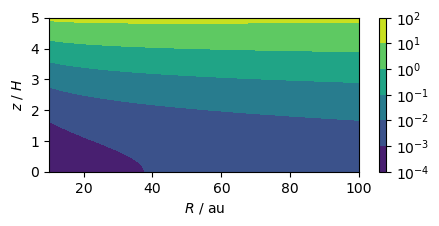

In [132]:
N = 10000
eps = 1e-4
# z = np.logspace(np.log10(eps),np.log10(10),N)
z = np.linspace(0,5,N)
u = np.tile(u0,(N,1)) * np.exp( 1/np.tile(H_R**2,(N,1)) * (1 - ( 1 + np.tile(H_R**2,(N,1))*np.tile(z,(P,1)).T**2 )**(-0.5) ) )
z_cs = []
for i in np.argmin(np.abs(u-1), axis=0):
    z_cs.append(z[i])

plt.contourf(R, z, u, locator=ticker.LogLocator())
plt.colorbar()
plt.xlabel('$R$ / $\\mathrm{au}$')
plt.ylabel('$z$ / $H$')

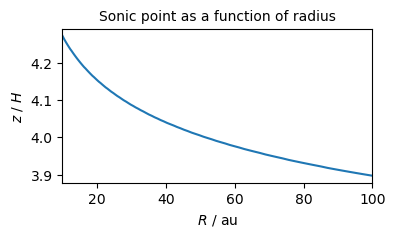

In [ ]:
rcParams['figure.figsize'] = (4,2)
plt.plot(R, z_cs)
plt.xlabel('$R$ / $\\mathrm{au}$')
plt.ylabel('$z$ / $H$')
plt.xlim(10,100)
plt.title('Sonic point as a function of radius', fontsize=10)
# plt.savefig('graphics/sonic_point.png', dpi=300, bbox_inches='tight')

(0.0, 0.0027900179868400646)

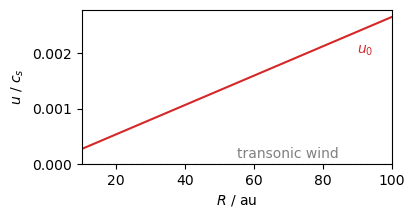

In [ ]:
rcParams['figure.figsize'] = (4,2)
plt.plot(R, np.exp( - 0.5 - 1/H_R**2 ), ls='--', c='C7', lw=0.8)
plt.plot(R, u0, c='C3')
plt.text(55, 0.0001, 'transonic wind', c='grey')
plt.text(90, 0.002, '$u_0$', c='C3')
plt.ylabel('$u$ / $c_s$')
plt.xlabel('$R$ / $\\mathrm{au}$')
plt.xlim(10,100)
plt.ylim(0)
plt.savefig('graphics/mp_gas_vel.png', dpi=300, bbox_inches='tight')

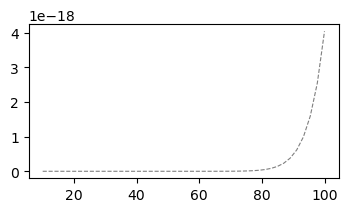

In [7]:
plt.plot(R, np.exp( - 0.5 - 1/H_R**2 ), ls='--', c='C7', lw=0.8)
